In [3]:
%load_ext autoreload

%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sweep import Sweep
import os
import seaborn as sns
from scipy import stats

import scikit_posthocs as sp
import json

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
data_vc = Sweep('14 dpi/VC_test/2022-03-29_001_04.asc', names=['index','time','I-mon','stimulus','time2', 'V-mon', 'stimulus2', 'time3', 'leak','stimulus3'])

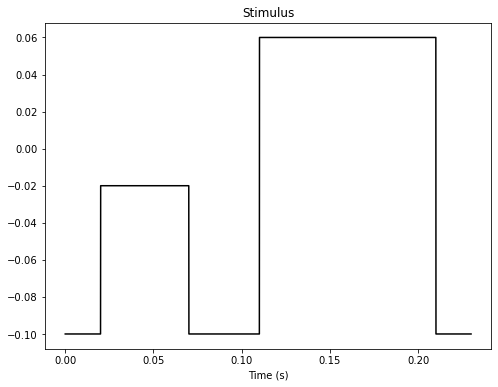

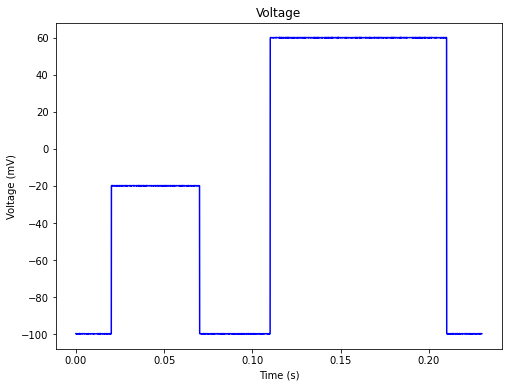

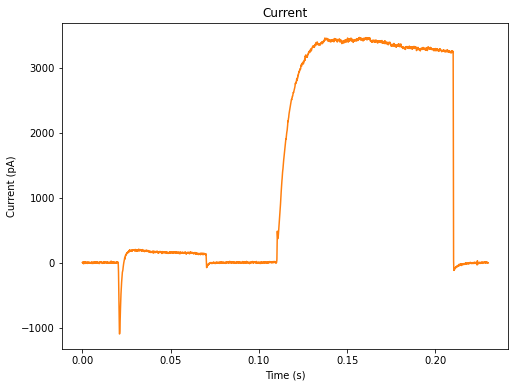

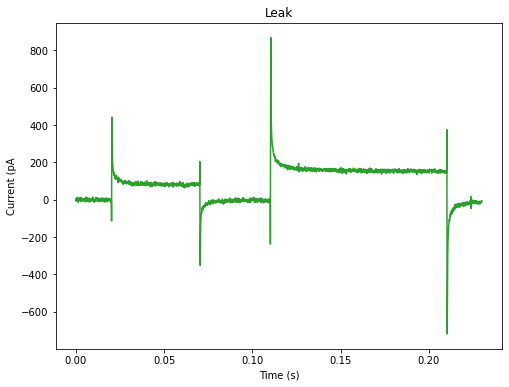

In [5]:
data_vc.plot()

In [6]:
inward_current = data_vc.current.min()
outward_current = data_vc.current.max()

In [7]:
inward_current

-1099.409341

In [8]:
outward_current

3466.922305

In [72]:
parameters = pd.read_excel('Parameters_merged.xlsx')

In [68]:
parameters

,Leak (pA),Input Resistance (MOhm),C-slow (pF),R-series (MOhm),C-fast (pF),filename
0,-50.272,662.16,4.6190,3.0677,6.9938,2022-03-29_001_01.asc
1,-57.166,657.10,6.5765,9.4525,6.9084,2022-03-29_001_02.asc
2,-88.087,656.50,3.8863,9.7526,6.9293,2022-03-29_001_03.asc
3,-38.272,751.14,6.7083,5.9734,6.7495,2022-03-29_001_04.asc
4,-48.661,1435.40,3.0983,5.3032,6.5679,2022-03-29_001_05.asc
...,...,...,...,...,...,...
86,-79.438,673.90,9.7688,4.9492,7.8710,2022-04-21_001_1.asc
87,-223.610,579.51,17.2900,7.5720,5.8879,2022-04-23_001_1.asc
88,-157.930,370.98,11.4370,5.0185,6.4483,2022-04-23_001_6.asc
89,-92.807,370.98,12.0220,6.2241,6.4537,2022-04-23_001_7.asc


In [70]:
float(parameters[parameters['filename']=='2022-03-29_001_02.asc']['C-slow (pF)'].values[0])

6.5765

In [20]:
dpi14_path = '14 dpi/VC_test/'
dpi15_path = '15 dpi/VC_test/'
dpi16_path = '16 dpi/VC_test/'
dpi17_path = '17 dpi/VC_test/'
drg_path = 'DRG/VC_test/'

In [76]:
def get_currents(path):
    inward_currents = []
    outward_currents = []
    for filename in os.listdir(path):
        filepath = os.path.join(path, filename)
        print(filename)
        data_vc = Sweep(filepath, names=['index','time','I-mon','stimulus','time2', 'V-mon', 'stimulus2', 'time3', 'leak','stimulus3'])
        inward_current = data_vc.current.min()
        outward_current = data_vc.current.max()
        capacitance = parameters[parameters['filename']==filename]['C-slow (pF)'].values
        inward_currents.append(inward_current/capacitance[0])
        outward_currents.append(outward_current/capacitance[0])
    return dict(zip(['inward currents', 'outward currents'], [inward_currents, outward_currents]))

In [77]:
all_currents = {'14dpi': get_currents(dpi14_path),
                '15dpi': get_currents(dpi15_path),
                '16dpi': get_currents(dpi16_path),
                '17dpi': get_currents(dpi17_path),
                'drg': get_currents(drg_path)}

2022-03-29_001_01.asc
2022-03-29_001_02.asc
2022-03-29_001_03.asc
2022-03-29_001_04.asc
2022-03-29_001_05.asc
2022-03-29_001_06.asc
2022-03-29_001_07.asc
2022-03-29_001_08.asc
2022-03-29_001_09.asc
2022-03-29_001_10.asc
2022-03-29_001_12.asc
2022-03-29_001_14.asc
2022-03-29_001_15.asc
2022-03-29_001_16.asc
2022-03-29_001_18.asc
2022-03-29_001_19.asc
2022-03-29_001_20.asc
2022-03-30_001_04.asc
2022-03-30_001_05.asc
2022-03-30_001_07.asc
2022-03-30_001_09.asc
2022-03-30_001_11.asc
2022-03-30_001_12.asc
2022-03-30_001_13.asc
2022-03-30_001_14.asc
2022-03-30_001_15.asc
2022-03-30_001_16.asc
2022-03-30_001_17.asc
2022-03-30_001_18.asc
2022-03-30_001_20.asc
2022-03-30_001_21.asc
2022-03-30_001_23.asc
2022-03-30_001_24.asc
2022-04-06_001_02.asc
2022-04-06_001_03.asc
2022-04-06_001_04.asc
2022-04-06_001_08.asc
2022-04-06_001_10.asc
2022-04-06_001_11.asc
2022-04-06_001_12.asc
2022-04-06_001_13.asc
2022-04-06_001_15.asc
2022-04-06_001_16.asc
2022-04-13_001_01.asc
2022-04-13_001_03.asc
2022-04-13

In [80]:
with open("Currents.json", "w") as outfile:
    json.dump(all_currents, outfile, indent=4)

In [82]:
all_currents['drg']

{'inward currents': [-563.8573992078888,
  -223.9245639933166,
  -237.16472654807035,
  -302.42867666025325,
  -72.51565425476376,
  -191.0558209947947,
  -550.5858561685757,
  -197.40989926800864,
  -719.6614984665857,
  -270.4149624023036,
  -528.1945364834984,
  -453.78927576315226,
  -74.88802191946715],
 'outward currents': [436.6354962010992,
  471.08593826232243,
  648.8623405268785,
  401.70313550542323,
  425.32194883842334,
  206.7045076344708,
  870.5926112616945,
  744.4054430211279,
  698.9857107196348,
  557.9191937474291,
  423.90771732454346,
  502.8797853972722,
  440.77796881622766]}

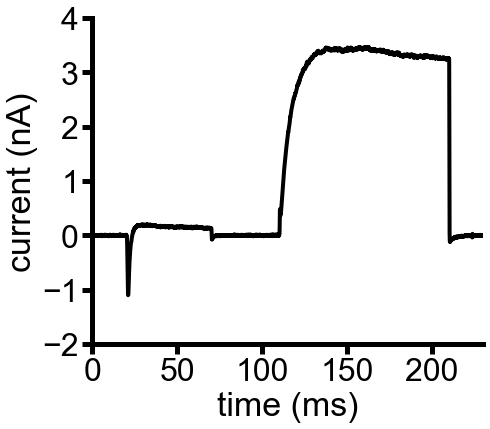

In [126]:
fig, ax1 = plt.subplots(figsize=(7,6))
ax1.plot(data_vc.time[0]*1000, data_vc.current[0]/1000, c='k',linewidth=4)


ax = plt.gca()
ax.set_xlim([0, 230])
ax.set_ylim([-2, 4])
ax.tick_params(length=6, width=4)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines['left'].set_linewidth(5)
ax1.spines['bottom'].set_linewidth(5)
ax.tick_params(length=10, width=5)
#ax.spines['left'].set_bounds(-800, -600)
plt.xticks(fontsize=32, fontname='Arial')
plt.yticks(fontsize=32, fontname='Arial')

plt.xlabel('time (ms)', fontsize=34, fontname='Arial')
plt.ylabel('current (nA)', fontsize=34,fontname='Arial')



plt.savefig('Currents.png', bbox_inches = "tight")   
plt.show() 

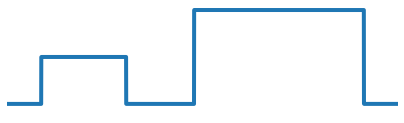

In [125]:
fig, ax1 = plt.subplots(figsize=(7,2))

ax = plt.gca()
ax.set_xlim([0, 230])
ax.set_ylim([-2, 8])

ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
plt.yticks([])

ax2 = ax1.twinx()
ax2.spines["top"].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
plt.yticks([])
plt.xticks([])
ax2.tick_params(length=0, width=0)

#plt.ylabel('voltage (mV)', fontsize=34,fontname='Arial', color='C0')
ax2.plot(data_vc.time[0]*1000, data_vc.voltage[0], c='C0',linewidth=4)
ax2.set_ylim([-120, 65])
#ax.text(y=5, x=80, s='-100mV',  fontname="Arial", fontweight='bold', fontsize=26)


plt.savefig('Currents_-20_60.png', bbox_inches = "tight")   
plt.show() 